# Проект "Определение перспективного тарифа для телеком-компании"

## Описание проекта

Представлены сведения компании мобильной связи о предоставленных услугах.
Статистика представлена в разрезе одновременно клиентов и сеансов связи (звонки, сообщения, интернет).
Представлена также информация по клиентам.
Заданием предусмотрена аггрегация и вычисление сведений об использовании услуг каждым клиентом в разрезе месяцев.
На основании таких сведений предусмотрена проверка гипотез:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>
    <ul class="toc-item"><li><span><a href="#Вывод-по-результатам-изучения-данных" data-toc-modified-id="Вывод по результатам изучения данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по результатам изучения данных</a></span></li></ul></li>
    <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3.1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span>
     <ul class="toc-item"><li><span><a href="#Вывод-по-результатам-расчета-и-добавления-данных" data-toc-modified-id="Вывод по результатам расчета и добавления данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по результатам расчета и добавления данных</a></span></li></ul></li>
    <li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li>
        <ul class="toc-item"><li><span><a href="#Вывод-по-исследовательскому-анализу" data-toc-modified-id="Вывод по исследовательскому анализу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по исследовательскому анализу</a></span></li></ul>
    <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li>
        <ul class="toc-item"><li><span><a href="#Вывод-по-проверке-гипотез" data-toc-modified-id="Вывод по проверке гипотез -5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по проверке гипотез</a></span></li></ul>
        <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
cls_set = pd.read_csv('/datasets/calls.csv')
cls_set.info()
cls_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
int_set = pd.read_csv('/datasets/internet.csv')
int_set.info()
int_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
msg_set = pd.read_csv('/datasets/messages.csv')
msg_set.info()
msg_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
trf_set = pd.read_csv('/datasets/tariffs.csv')
trf_set.info()
trf_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
usr_set = pd.read_csv('/datasets/users.csv')
usr_set.info()
usr_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод по результатам изучения данных
Все представленные данные удалось прочитать. Значения дат в таблицах целесообразно преобразовать в значение типа datetime. 
Так эти значения будет проще группировать и категорировать

## Предобработка данных

In [7]:
#Преобразуем в соответствующий формат ячейки, которые фактически содержат дату
cls_set['call_date']=pd.DatetimeIndex(cls_set['call_date'])
int_set['session_date']=pd.DatetimeIndex(int_set['session_date'])
msg_set['message_date']=pd.DatetimeIndex(msg_set['message_date'])
usr_set['reg_date']=pd.DatetimeIndex(usr_set['reg_date'])
usr_set['churn_date']=pd.DatetimeIndex(usr_set['churn_date'])

In [8]:
#получим сумму минут звонков, предварительно округлив в большую сторону.
cls_grp=cls_set.groupby(['user_id',pd.Grouper(freq='MS',key='call_date')]).agg(calls_sum=('duration', lambda x:sum(np.ceil(x))),calls_qty=('duration',lambda y:y.count())).reset_index()
cls_grp.rename(columns={'call_date':'month_start'},inplace=True)
display(cls_grp.head())

,user_id,month_start,calls_sum,calls_qty
0,1000,2018-05-01,159.0,22.0
1,1000,2018-06-01,172.0,43.0
2,1000,2018-07-01,340.0,47.0
3,1000,2018-08-01,408.0,52.0
4,1000,2018-09-01,466.0,58.0


In [9]:
int_grp=int_set.groupby(['user_id',pd.Grouper(freq='MS',key='session_date')]).agg(gb_round=('mb_used', lambda x:np.ceil(sum(x/1024)))).reset_index()
int_grp.rename(columns={'session_date':'month_start'},inplace=True)
int_grp.head()

,user_id,month_start,gb_round
0,1000,2018-05-01,3.0
1,1000,2018-06-01,23.0
2,1000,2018-07-01,14.0
3,1000,2018-08-01,14.0
4,1000,2018-09-01,15.0


In [10]:
all_use = pd.merge(cls_grp, int_grp, how='outer',left_on=('user_id','month_start'), right_on=('user_id','month_start'))
all_use.head()

,user_id,month_start,calls_sum,calls_qty,gb_round
0,1000,2018-05-01,159.0,22.0,3.0
1,1000,2018-06-01,172.0,43.0,23.0
2,1000,2018-07-01,340.0,47.0,14.0
3,1000,2018-08-01,408.0,52.0,14.0
4,1000,2018-09-01,466.0,58.0,15.0


In [11]:
msg_grp = msg_set.groupby(['user_id',pd.Grouper(freq='MS',key='message_date')]).agg({'id':'count'}).reset_index()
msg_grp.rename(columns={'id':'msg_qty','message_date':'month_start'},inplace=True)
msg_grp.head()

,user_id,month_start,msg_qty
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


In [12]:
all_use = pd.merge(all_use, msg_grp, how='outer',on=('user_id','month_start'))
all_use.head()

,user_id,month_start,calls_sum,calls_qty,gb_round,msg_qty
0,1000,2018-05-01,159.0,22.0,3.0,22.0
1,1000,2018-06-01,172.0,43.0,23.0,60.0
2,1000,2018-07-01,340.0,47.0,14.0,75.0
3,1000,2018-08-01,408.0,52.0,14.0,81.0
4,1000,2018-09-01,466.0,58.0,15.0,57.0


создадим таблицу с выручкой по клиентам-месяцам. 
В такой таблице мы получим записи за все месяцы, в т.ч. в которых клиенты не пользовались мобильной связью.
в этом случае в таблице будет только абон.плата
посчитаем месяц начала и конца обслуживания - 
для клиентов у которых окончание обслужвиания не заполнено, проставим месяц окончания - 12

In [13]:

user_revenue = pd.DataFrame(columns=['user_id','month','tariff','tariff_fee'])


usr_set['month_start']=pd.DatetimeIndex(usr_set['reg_date']).month.astype(int)
usr_set['month_end']=pd.DatetimeIndex(usr_set['churn_date']).month.fillna(12).astype(int)
for ind, row in usr_set.iterrows():
    #Запустим цикл по значениям от первого до последнего месяца обслуживания и проставим абонентску плату. 
    #так мы создадим строки таблицы для услуг клиентам за каждый месяц действия договора:
    for i in range(row['month_start'],row['month_end']+1):
        #создаем лямбда функцию для присваивания значения стоимости тарифа
        tariff_fee = lambda x:550 if x=='smart' else 1950
        new_row = (row['user_id'],i,row['tariff'],tariff_fee(row['tariff']))
        user_revenue.loc[len(user_revenue)+1]=new_row

In [14]:
user_revenue.head(20)

,user_id,month,tariff,tariff_fee
1,1000,5,ultra,1950
2,1000,6,ultra,1950
3,1000,7,ultra,1950
4,1000,8,ultra,1950
5,1000,9,ultra,1950
6,1000,10,ultra,1950
7,1000,11,ultra,1950
8,1000,12,ultra,1950
9,1001,11,smart,550
10,1001,12,smart,550


In [15]:
all_use['month'] = pd.DatetimeIndex(all_use['month_start']).month.astype(int)
all_use=all_use.drop('month_start',axis=1)
user_revenue = pd.merge(user_revenue,all_use,how='left',on=('user_id','month'))
user_revenue.head()

,user_id,month,tariff,tariff_fee,calls_sum,calls_qty,gb_round,msg_qty
0,1000,5,ultra,1950,159.0,22.0,3.0,22.0
1,1000,6,ultra,1950,172.0,43.0,23.0,60.0
2,1000,7,ultra,1950,340.0,47.0,14.0,75.0
3,1000,8,ultra,1950,408.0,52.0,14.0,81.0
4,1000,9,ultra,1950,466.0,58.0,15.0,57.0


Проверим строки по которым услуг не было установлено вообще:

In [16]:
user_revenue.query('calls_sum.isna() and calls_qty.isna() and gb_round.isna() and msg_qty.isna()',engine='python').head()

,user_id,month,tariff,tariff_fee,calls_sum,calls_qty,gb_round,msg_qty
827,1128,12,ultra,1950,NaN,NaN,NaN,NaN
2335,1371,12,smart,550,NaN,NaN,NaN,NaN


Всего две записи по 2м клиентам по которым отсутствует объем оказанных услуг. Посмотрим данные по этим клиентам:

In [17]:
usr_set.query('user_id==1128 or user_id==1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_start,month_end
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12


Установлено 2 клиента подключившиеся в последнем месяце анализируемого периода. По данным клиентам не зафиксировано использование услуг связи (звонки, сеансы интернета, сообщения) однако по данным клиентам будет выручка в части абонентской платы.

In [18]:
#в таблице остались пропущенные значения в столбцах с объемом потребленных услуг. Они соответствуют нулевому потреблению:
#для удобства рассчетов заменим пустые значения на 0.
user_revenue = user_revenue.fillna(0).reset_index()

## Расчёты и добавление результатов в таблицу

Посчитаем дополнительный доход от превышения клиентами пакета услуг, включенных в абонентскую плату. 
Для этого вычтем из суммы использованных услуг за месяц сумму включенную в абонентску плату. 
Отбросим отрицательное значение (возведем в квадрат и извлечем корень) и умножим на стоимость услуги.

In [19]:
user_revenue['revenue_calls']=np.nan
user_revenue['revenue_traffic']=np.nan
user_revenue['revenue_messages']=np.nan
for index, row in trf_set.iterrows():
    user_revenue.loc[user_revenue.tariff==row['tariff_name'],'revenue_calls']=(((user_revenue[user_revenue.tariff==row['tariff_name']]['calls_sum']-row['minutes_included'])*(user_revenue[user_revenue.tariff==row['tariff_name']]['calls_sum']-row['minutes_included']))**(1/2)+(user_revenue[user_revenue.tariff==row['tariff_name']]['calls_sum']-row['minutes_included']))/2*row['rub_per_minute']
    user_revenue.loc[user_revenue.tariff==row['tariff_name'],'revenue_traffic']=(((user_revenue[user_revenue.tariff==row['tariff_name']]['gb_round']-row['mb_per_month_included']/1024)*(user_revenue[user_revenue.tariff==row['tariff_name']]['gb_round']-row['mb_per_month_included']/1024))**(1/2)+(user_revenue[user_revenue.tariff==row['tariff_name']]['gb_round']-row['mb_per_month_included']/1024))/2*row['rub_per_gb']
    user_revenue.loc[user_revenue.tariff==row['tariff_name'],'revenue_messages']=(((user_revenue[user_revenue.tariff==row['tariff_name']]['msg_qty']-row['messages_included'])*(user_revenue[user_revenue.tariff==row['tariff_name']]['msg_qty']-row['messages_included']))**(1/2)+(user_revenue[user_revenue.tariff==row['tariff_name']]['msg_qty']-row['messages_included']))/2*row['rub_per_message']

In [20]:
user_revenue.head()

,index,user_id,month,tariff,tariff_fee,calls_sum,calls_qty,gb_round,msg_qty,revenue_calls,revenue_traffic,revenue_messages
0,0,1000,5,ultra,1950,159.0,22.0,3.0,22.0,0.0,0.0,0.0
1,1,1000,6,ultra,1950,172.0,43.0,23.0,60.0,0.0,0.0,0.0
2,2,1000,7,ultra,1950,340.0,47.0,14.0,75.0,0.0,0.0,0.0
3,3,1000,8,ultra,1950,408.0,52.0,14.0,81.0,0.0,0.0,0.0
4,4,1000,9,ultra,1950,466.0,58.0,15.0,57.0,0.0,0.0,0.0


In [21]:
user_revenue['total_revenue']=user_revenue['tariff_fee']+user_revenue['revenue_calls']+user_revenue['revenue_traffic']+user_revenue['revenue_messages']

In [22]:
user_revenue.head()

,index,user_id,month,tariff,tariff_fee,calls_sum,calls_qty,gb_round,msg_qty,revenue_calls,revenue_traffic,revenue_messages,total_revenue
0,0,1000,5,ultra,1950,159.0,22.0,3.0,22.0,0.0,0.0,0.0,1950.0
1,1,1000,6,ultra,1950,172.0,43.0,23.0,60.0,0.0,0.0,0.0,1950.0
2,2,1000,7,ultra,1950,340.0,47.0,14.0,75.0,0.0,0.0,0.0,1950.0
3,3,1000,8,ultra,1950,408.0,52.0,14.0,81.0,0.0,0.0,0.0,1950.0
4,4,1000,9,ultra,1950,466.0,58.0,15.0,57.0,0.0,0.0,0.0,1950.0


### Вывод по результатам расчета и добавления данных
Посчитано по каждому клиенту за каждый месяц нахождения на обслуживании: использование услуг и выручка формирующаяся как за счет абонентской платы так и за счет услуг, превышающих объем услуг, включенных в абонентскую плату.</p>
Проблемы на данном этапе не установлены.

## Исследовательский анализ данных

Посчитаем среднемесячные значения пользования услугами и выручки по каждому клиенту и выведем гистограммы распределения клиентов по активности использования услуг/приносимой выручке в разрезе тарифов.

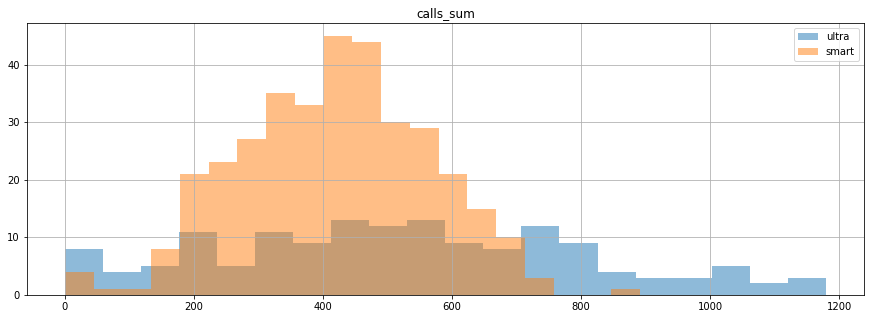

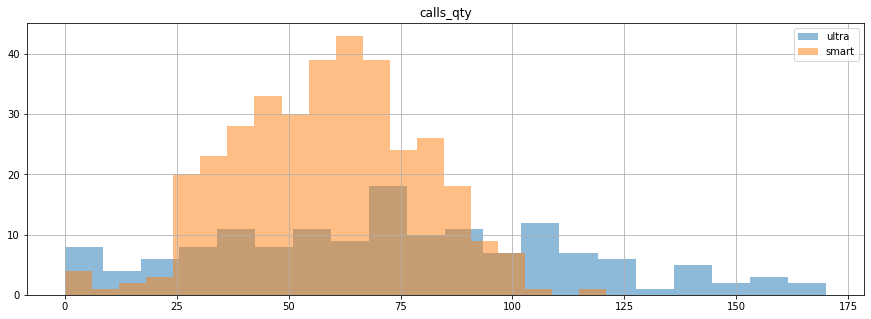

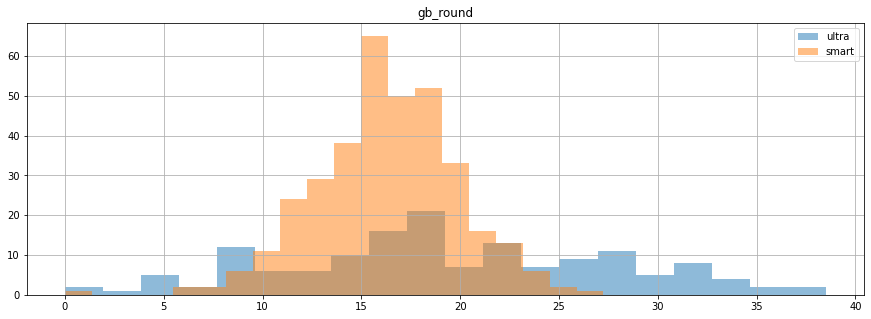

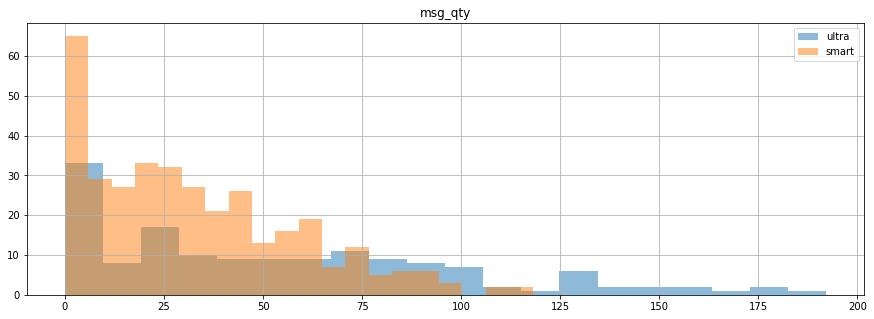

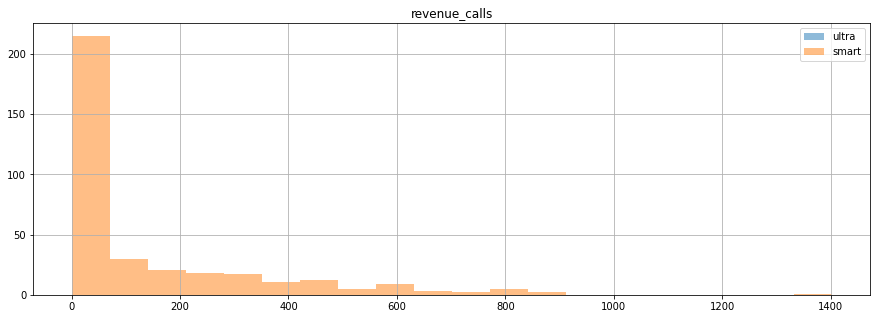

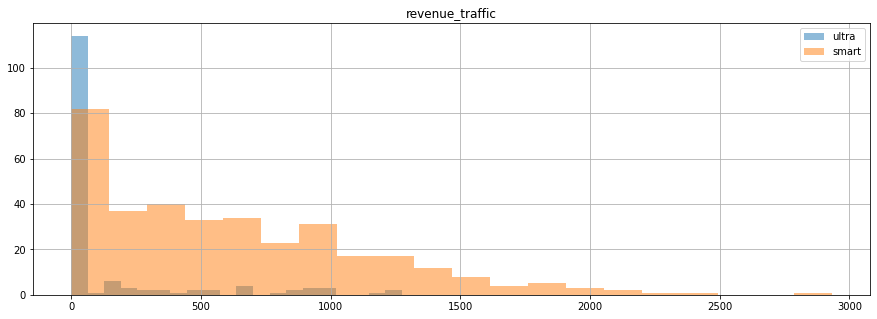

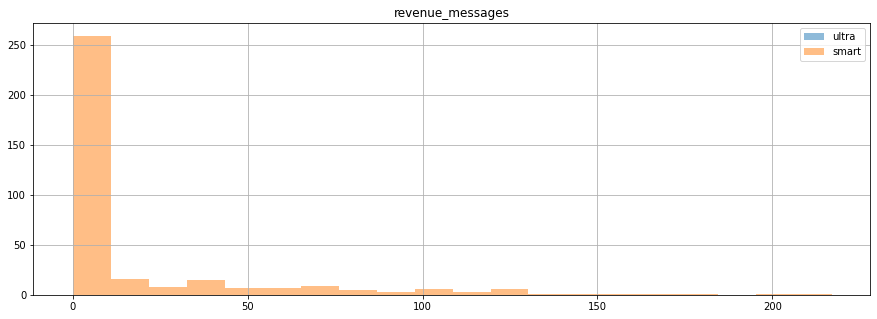

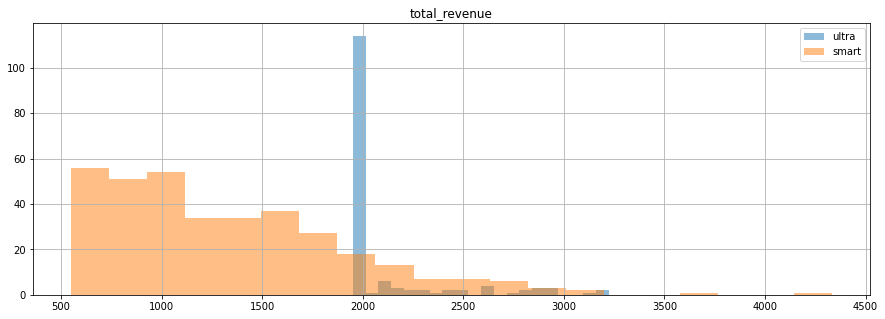

In [23]:
columns_print = ['calls_sum','calls_qty','gb_round','msg_qty','revenue_calls','revenue_traffic','revenue_messages','total_revenue']
pokazately_table = pd.DataFrame(columns = columns_print)
pokazately_table.insert(0,'tariff', ['ultra','smart','in general'])
for i in columns_print:
    user_revenue[user_revenue['tariff']=='ultra'].groupby('user_id')[i].mean().hist(figsize=(15,5),alpha=0.5,bins=20)
    user_revenue[user_revenue['tariff']=='smart'].groupby('user_id')[i].mean().hist(figsize=(15,5),alpha=0.5,bins=20)
    plt.title(i)
    plt.legend(['ultra','smart'])
    plt.show()
    pokazately_table.loc[0,i]=user_revenue[user_revenue['tariff']=='ultra'][i].mean()
    pokazately_table.loc[1,i]=user_revenue[user_revenue['tariff']=='smart'][i].mean()
    pokazately_table.loc[2,i]=user_revenue[i].mean()

In [24]:
pokazately_table.loc[:,'calls_sum':'total_revenue'] = pokazately_table.loc[:,'calls_sum':'total_revenue'].astype(float)
pokazately_table = pokazately_table.round(2)
pokazately_table

,tariff,calls_sum,calls_qty,gb_round,msg_qty,revenue_calls,revenue_traffic,revenue_messages,total_revenue
0,ultra,526.09,73.32,19.47,49.31,0.00,120.03,0.00,2070.03
1,smart,417.75,58.44,16.32,33.37,124.76,597.49,17.39,1289.64
2,in general,450.96,63.00,17.29,38.26,86.51,451.10,12.06,1528.90


Посчитаем статистические метрики по каждому показателю:

In [25]:
columns_anlz = ['calls_sum','calls_qty','gb_round','msg_qty']
anlz_table = pokazately_table.loc[:,'tariff':'msg_qty']
for i in columns_anlz:
    position = list(anlz_table.columns).index(i)
    anlz_table.insert(position+1,(i+'_disp'),[np.var(user_revenue[user_revenue['tariff']=='ultra'][i]),np.var(user_revenue[user_revenue['tariff']=='smart'][i]),np.var(user_revenue[i])])
    anlz_table.insert(position+1,(i+'_std'),np.nan)
    anlz_table[i+'_std'] = np.sqrt(anlz_table[i+'_disp'])
    

In [26]:
anlz_table = anlz_table.round(2)
anlz_table.head()

,tariff,calls_sum,calls_sum_std,calls_sum_disp,calls_qty,calls_qty_std,calls_qty_disp,gb_round,gb_round_std,gb_round_disp,msg_qty,msg_qty_std,msg_qty_disp
0,ultra,526.09,317.73,100950.01,73.32,43.93,1930.24,19.47,9.86,97.28,49.31,47.78,2283.10
1,smart,417.75,190.43,36265.12,58.44,25.96,673.80,16.32,5.75,33.12,33.37,28.22,796.60
2,in general,450.96,242.06,58592.40,63.00,33.26,1106.10,17.29,7.41,54.90,38.26,36.14,1306.39


### Вывод по исследовательскому анализу
Анализ графиков и средних значений показывает:
1. отсутствие очевидных выбросов;
2. количество звонков осуществляемых на тарифе smart находится в пике на уровне предельного значения (400-500 минут в месяц), по тарифу ultra пиковое значение приходится на 400-800 минут в месяц.
Это может свидетельствовать о том что 500 минут установленные на тарифе smart несколько меньше оптимального значения и таким образом заставляют клиентов поджиматься по достижению лимита по тарифу.
При этом максимально доступный объем бесплатных звоноков на тарифе ultra остается невыбранным. При 3000 доступных минут, в редких случаях используется более 1000 минут.
Клиенты у которых среднемсячное использование звонков превышет 1200 минут - отсутствуют.
3. количество звонков на тарифе smart также нарастет до определенного предела (в 70 звонков) и резко снижается, что подтверждает 
что клиенты на данном тарифе поджимаются по использованию звонков при выходе за пределы включенного пакета услуг. 
Кроме того поминутная тарификация приводит к определенному ограничению на количество возможных звонков в течение месяца. Т.к. многие звонки превышают 1 минуту, 
при этом короткие звонки существенно меньше минуты (10-20 секунд) нецелесообразны, т.к. тарифицируются как 1 минута.
Количество звонков на тарифе ultra также имеет пик, однако неявно выраженный, что вызвано  большим запасом по включенным в тариф минутам. Клиенты не ограничивают себя, как следствие распределение шире.
5. Количество клиентов отправляющих много сообщений на тарифе смарт снижается c ростом количества сообщений и сводится к 0 на уровне в 100 сообщений в месяц. На тарифе ultra снижение количества клиентов отправляющих много сообщений не имеет такой резкой корелляции с ростом количества сообщений,
при этом в среднем никто из клиентов тарифа Ultra не использует включенные в тариф 1000 сообщений (максимальное среднее не превышает 200 сообщений)
Таким образом среднемесячное количество сообщений на тарифе Ultra ограничено отсутствием потребности в количестве сообщений свыше 200. На тарифе Smart, платность сообщении свыше 50-ти очевидно является причиной равномерного снижения использования сообщений уже до границы в 100 сообщений. Однако очевидно что стоимость сообщений не приводит к резкому отказу при превышении лимита бесплатных сообщений. Таким образом количество необходимых клиентам сообщений находится в пределах 100-200 сообщений в месяц.
6. Клиенты превышают установленные ограничения траффика как на тарифе Smart таки и Ultra. 
При этом на тарифе Smart установленного лимита очевидно недостаточно, что приводит к концентрации потребления клиентами траффика в районе лимита бесплатного использования. На тарифе Ultra большая часть клиентов равномерно распределена по интенсивности использовани траффика в пределах от 5 до 30 gb. По превышению лимита в 30 гб количество клиентов сходит на нет.
Таким образом лимит трафика в 30 гб  вполной мере удовлетворяет большую часть клиентов, при этом в целом не является избыточным.
6. Данные о доходах также показывают что на тарифе ultra количество звонков и сообщений включенных в тариф превышает потребности клиентов
доходы от звонков и сообщений сверх тарифа в анализируемом периоде отстутсвуют. 
Имеется незначительный доход от превышения ограничения по траффику передачи данных.
На тарифе smart клиенты регулярно превышают как ограничения по звонкам, так и по траффику передачи данных, 
что сказывается на существенно больших сборах за услуги, превышающие обхем включенный в абонентскую плату.
Значения дисперсии и стандартного отклонения по тарифам utra и smart подтверждают ранее сделанные выводы - разброс в объеме используемых услуг на тарифе ultra существенно больше, что вероятно связано с завышенными знаениями пакетов услуг, включенных в абонентску плату.
При этом на тарифе smart объемы услуг, включенные в абонентскую плату находятся в пределах максимальной потребности, что существенно соrращает распределение значений т.к. ограничивает распределение сверх лимита.

## Проверка гипотез

<b>Гипотеза 1</b> "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".
Рассчитаем средние значения выручки для указанных тарифов:

In [27]:
print('среднее знаение выручки для клиента на тарифе ultra', round(user_revenue[user_revenue['tariff']=='ultra']['total_revenue'].mean(),2))
print('среднее знаение выручки для клиента на тарифе smart', round(user_revenue[user_revenue['tariff']=='smart']['total_revenue'].mean(),2))

среднее знаение выручки для клиента на тарифе ultra 2070.03
среднее знаение выручки для клиента на тарифе smart 1289.64


Посчитаем количество клиентов для каждого тарифа чтобы оценить споставимость данных для статистического анализа:

In [28]:
print('количество клиентов с тарифом ultra =', len(usr_set[usr_set.tariff=='ultra']))
print('количество клиентов с тарифом smart =', len(usr_set[usr_set.tariff=='smart']))

количество клиентов с тарифом ultra = 149
количество клиентов с тарифом smart = 351


In [29]:
print('Значение дисперсии для выборки по тарифам ultra и smart составило соответственно -',round(np.var(user_revenue[user_revenue['tariff']=='ultra']['total_revenue']),2),round(np.var(user_revenue[user_revenue['tariff']=='smart']['total_revenue']),2))

Значение дисперсии для выборки по тарифам ultra и smart составило соответственно - 141244.32 669430.44


В качестве 0 гипотезы возьмем среднее значение по выборке для тарифа smart и проведем ttest для этой величины по выборке для тарифа ultra.
Гипотеза о неравенстве выручки на тарифах будет принята в случае вроятности получения средней выручки для тарифа ultra равной средней выручке для тарифа smart менее 5% (alpha = 0.05).
Учитывая существенное различие дисперсии для выборок указываем соответствующий параметр equal_var = False

In [30]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(user_revenue[user_revenue['tariff']=='ultra']['total_revenue'],user_revenue[user_revenue['tariff']=='smart']['total_revenue'],equal_var=False).pvalue
if results < alpha:
    print('Гипотеза о неравенстве выручки для клиентов на разных тарифах принимается:')
    print('вероятность совпадения средних значений выручки составила ', results)
else:
    print('Гипотеза о неравенстве выручки для клиентов на разных тарифах отклоняется:')
    print('вероятность совпадения средних значений выручки составила ', results)

print()

Гипотеза о неравенстве выручки для клиентов на разных тарифах принимается:
вероятность совпадения средних значений выручки составила  1.927011394420941e-250



<b>Гипотеза 2</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Посчитаем количество клиентов из Москвы и из других регионов:

In [31]:
print('Количество клиентов из г. Москва =',len(usr_set[usr_set['city']=='Москва']))
print('Количество клиентов из других городов =',len(usr_set[usr_set['city']!='Москва']))

Количество клиентов из г. Москва = 99
Количество клиентов из других городов = 401


Предлагается взять в выборку всех клиентов из г. Москва ввиду относительно небольшого их количества, а также всех клиентов из других городов, т.к. с учетом небольшого количества клиентов из каждого города формирование репрезентативной выборки может быть проблематично.
В качестве 0 гипотезы возьмем среднее значение по выборке для города Москва и проведем ttest для этой величины по значениям для прочих городов.
Гипотеза о неравенстве выручки на тарифах будет принята если значение вроятности получения средней выручки для прочих городов равной выручке для клиентов из г. Москва менее 5% (alpha = 0.05).
Учитывая существенное различие дисперсии для выборок указываем соответствующий параметр equal_var = False

In [32]:
city_user = user_revenue.loc[:,('user_id','total_revenue')]
city_user = pd.merge(city_user,usr_set,on='user_id')[['user_id','city','total_revenue']]
city_user.head()

,user_id,city,total_revenue
0,1000,Краснодар,1950.0
1,1000,Краснодар,1950.0
2,1000,Краснодар,1950.0
3,1000,Краснодар,1950.0
4,1000,Краснодар,1950.0


In [33]:
print('Значение дисперсии для выборки по г. Москва и всем остальным составило соответственно -',round(np.var(city_user[city_user['city']=='Москва']['total_revenue']),2),round(np.var(city_user[city_user['city']!='Москва']['total_revenue']),2))

Значение дисперсии для выборки по г. Москва и всем остальным составило соответственно - 564710.71 653818.49


Учитывая разность дисперсии и несоответствие объемов выборки указываем соовтетствующий параметр  equal_var = False.

In [34]:
alpha = 0.05
results = st.ttest_ind(city_user[city_user['city']=='Москва']['total_revenue'],city_user[city_user['city']!='Москва']['total_revenue'],equal_var=False).pvalue
if results < alpha:
    print('Гипотеза о неравенстве средней выручки для клиентов из г. Москва и других городов принимается:')
    print('вероятность совпадения средних значений выручки составила ', results)
else:
    print('Гипотеза о неравенстве средней выручки для клиентов из г. Москва и других городов отклоняется:')
    print('вероятность совпадения средних значений выручки составила ', results)


Гипотеза о неравенстве средней выручки для клиентов из г. Москва и других городов отклоняется:
вероятность совпадения средних значений выручки составила  0.5216952110000278


### Вывод по проверке гипотез

Зависимость выручки от тарифа обслуживания клиентов подтвердилась. Для анализа представлена достаточно большая выборка, позволяющая сделать такой вывод.
Зависимость выручки от города проживания клиента не подтвердилась, очевидно сумма расходов на связь не является достаточно критичной для жителей как г. Москва так и регионов и не оказывает принципиального влияния на долю пользователей активно пользующихся услугами свыше установленного лимита, либо приобретающими тариф Ultra.

### Общий вывод

1. В представленных для анализа данных не выявлены системные ошибки и/или очевидные выбросы.
2. Установлены объемы необходимых клиентам услуг. Они в целом совпадают на разных тарифах:
    звонки 400-800 минут
    траффик до 30 гб
    сообщения до 200.
3. ввиду стоимостных ограничений клиенты более экономичного тарифа smart вынуждены ограничивать себя по достижению:
    лимита звонков в 500 минут, лимита траффика в 15 гигабайт. 
    Наблюдаются пиковые значения использования услуг на границе этих лимитов
4. Подтверждена зависимость выручки от тарифа обслуживания - выручка от клиентов на тарифе Ultra выше клиентов на тарифе Smart (2070 руб/мес против 1289 руб/мес).
5. Не подтверждена зависимость выручки от города проживания клиента. 
Выручка по клиентам в г. Москва в целом соответствует выручке по клиентам в других регионах.</p>
</p>С учетом установленных зависимостей можно сделать вывод о преимуществе для компании продвижения тарифа Ultra как более доходного (приносящего большую выручку), вне зависимости от региона обслуживания. При этом включенные в тариф Ultra предоплаченные пакеты услуг в полной мере обеспечивают потребности клиентов.